In [1]:
# Loading 
import glob 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, hilbert, chirp
from itertools import islice 
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import scale, normalize
from scipy.signal import welch
import torch
from scipy.stats import kurtosis
import antropy as ant

## Looking at the features

In [2]:
# load test data into the project
labels = pd.read_csv('data/bagData/Labels_all.csv')
idx = 10
filename = labels.iloc[idx]['filenames']

test_data = np.load('data/bagData/'+filename).astype(np.float64)

print('PD-subject',labels.iloc[idx])
print(test_data.shape)


PD-subject filenames    10_110011.npy
binary                   1
Name: 10, dtype: object
(180, 500, 12)


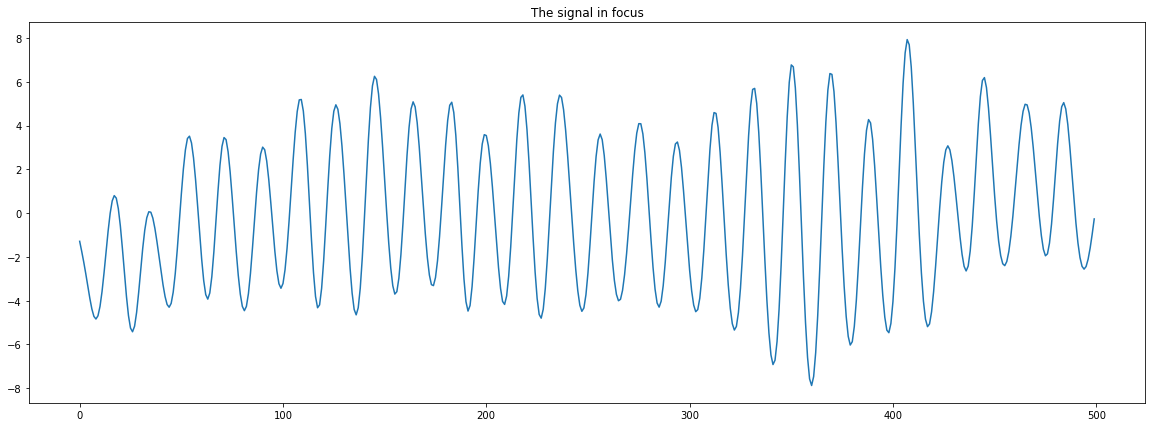

In [3]:
fig = plt.figure(figsize=(20,7))
plt.title('The signal in focus')
plt.plot(test_data[0,:,3])

### The range, RMS, Entropy

* The range
* RMS (root mean square)
* Shanon Entropy

In [43]:
range_ = np.max(test_data[0,:,3])- np.min(test_data[0,:,3])
print('The range is', range_)

The range is 15.802179336547852


In [46]:
RMS = np.mean(np.sqrt(test_data[0,:,3]**2))
print('Root mean square', RMS)

Root mean square 2.9465935446415097


In [47]:
entropy = ant.app_entropy(test_data[0,:,3])
print('Shanon Entropy',entropy)

Shanon Entropy 0.5449180556171402


### Dominant Frequency

In [ ]:
# Dominant Frequency

# Ratio of energy in the dominant frequency over total energy 

# The peak normalized cross-correlation 

# the time lag associated with the peak were computed over 

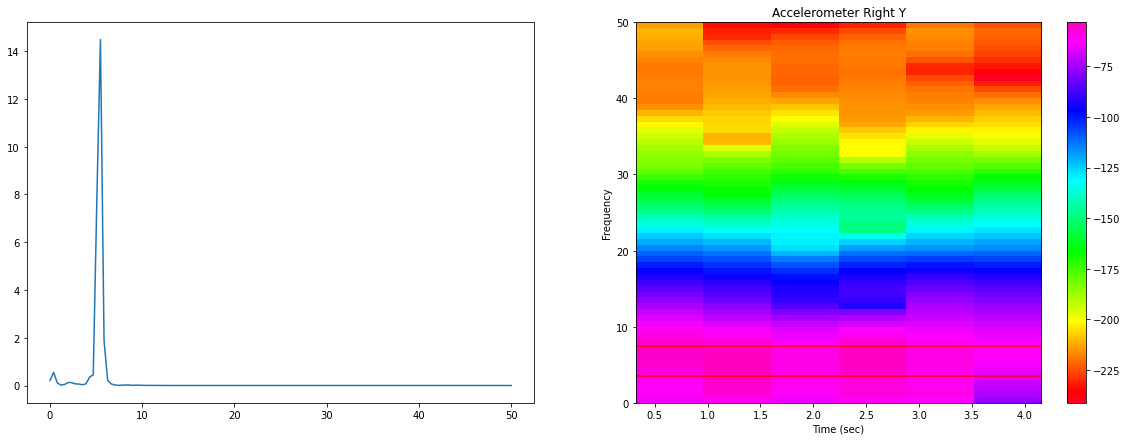

In [4]:
fs = 100

NFFT = 128
noverlap = int(0.50*NFFT)

f, spec = welch(test_data[0,:,3], fs=fs)


fig = plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(f,spec)


plt.subplot(1,2,2)
powerSpectrumYR, freqenciesFoundYR, _, _  = plt.specgram(test_data[0,:,0], Fs=fs, NFFT=NFFT,
                                                         noverlap=noverlap, 
                                                         window=signal.gaussian(NFFT,std=5), 
                                                         cmap='gist_rainbow',scale = 'dB')
plt.axhline(y=3.5, color='r', linestyle='-')
plt.axhline(y=7.5, color='r', linestyle='-')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.title('Accelerometer Right Y')
plt.colorbar()

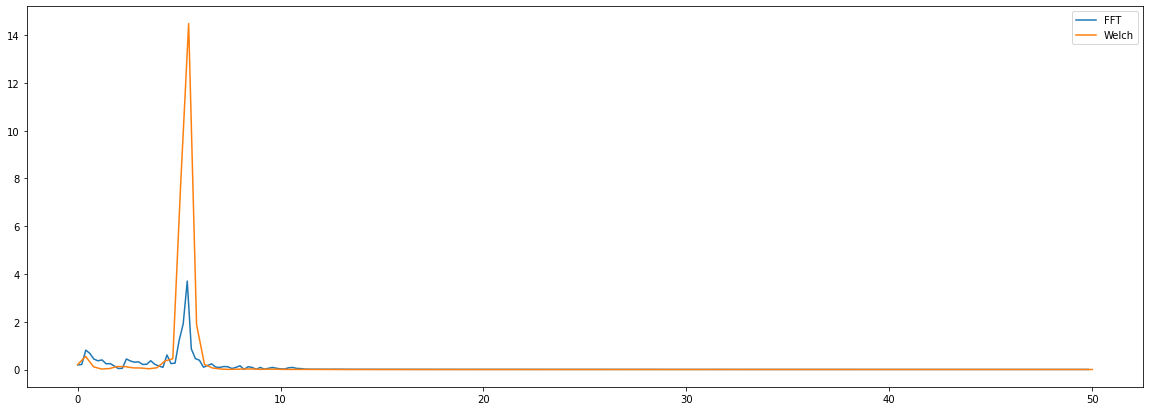

In [41]:
fig = plt.figure(figsize=(20,7))

from scipy.fft import fft, ifft,fftfreq
N = 500
T = 1.0 / 100 
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = fftfreq(N, T)[:N//2]
yf = fft(test_data[0,:,3])
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),label='FFT')
plt.plot(f, spec,label='Welch')
plt.legend()